## Titanic Dataset - Decision Tree Regression

## Part - 1. Importing

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
 

Importing Dataset

In [3]:
df = pd.read_csv('titanic_train.csv')


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
X = df.drop(['Survived'], axis = 1)
y = df['Survived']

X.drop(columns = ['PassengerId', 'Ticket'], inplace = True)

In [6]:
X.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

## Part - 2. Data Preprocessing

## Missing Values

In [7]:
X.isna().sum() 

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**Handle Cabin - Missing values**

**Cabin has too many missing values, also they don't seem to be important and imputing them would only add noise and be a waste of time**

In [8]:
X = X.drop(columns = ['Cabin'])

**Handle Age - Missing values**

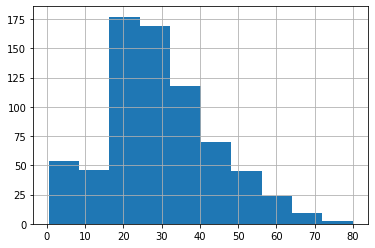

In [9]:
df['Age'].hist()

In [10]:
mis_age = X.copy()
mis_age = mis_age.loc[ mis_age['Age'].isna(), :]
mis_age.loc[ mis_age['Age'].isna(), 'Age'] = 0 #Replacing Nan values with 0

Creating Salutation title from Name to detect the Age

In [11]:
mis_age['Salutation'] =mis_age['Name'].str.extract(r"(Ms|Miss|Mrs|Mme|Mlle|Mr|Master|Major|Rev|Col|Capt|Don|Dr)")

In [12]:
mis_age.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation
5,3,"Moran, Mr. James",male,0.0,0,0,8.4583,Q,Mr
17,2,"Williams, Mr. Charles Eugene",male,0.0,0,0,13.0000,S,Mr
19,3,"Masselmani, Mrs. Fatima",female,0.0,0,0,7.2250,C,Mrs
26,3,"Emir, Mr. Farred Chehab",male,0.0,0,0,7.2250,C,Mr
28,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,0.0,0,0,7.8792,Q,Miss


In [13]:
X['Salutation'] = X['Name'].str.extract(r"(Ms|Miss|Mrs|Mme|Mlle|Mr|Master|Major|Rev|Col|Capt|Don|Dr)")

In [14]:
print (np.mean(X.loc[(X['Sex'] == 'female') & (X['Salutation'] == 'Mme'), 'Age']))
print (np.mean(X.loc[(X['Sex'] == 'female') & (X['Salutation'] == 'Miss') , 'Age']))
print (np.mean(X.loc[(X['Sex'] == 'female') & (X['Salutation'] == 'Ms'), 'Age']))
print (np.mean(X.loc[(X['Sex'] == 'female') & (X['Salutation'] == 'Mrs'), 'Age']))
print (np.mean(X.loc[(X['Sex'] == 'female') & (X['Salutation'] == 'Mlle'), 'Age']))

print ()
print (np.mean(X.loc[(X['Sex'] == 'male') & (X['Salutation'] == 'Master'), 'Age']))
print (np.mean(X.loc[(X['Sex'] == 'male') & (X['Salutation'] == 'Mr'), 'Age']))
print (np.mean(X.loc[(X['Sex'] == 'male') & (X['Salutation'] == 'Major'), 'Age']))
print (np.mean(X.loc[(X['Sex'] == 'male') & (X['Salutation'] == 'Rev'), 'Age']))
print (np.mean(X.loc[(X['Sex'] == 'male') & (X['Salutation'] == 'Col'), 'Age']))
print (np.mean(X.loc[(X['Sex'] == 'male') & (X['Salutation'] == 'Capt'), 'Age']))
print (np.mean(X.loc[(X['Sex'] == 'male') & (X['Salutation'] == 'Don'), 'Age']))
print (np.mean(X.loc[(X['Sex'] == 'male') & (X['Salutation'] == 'Dr'), 'Age']))


24.0
21.868965517241378
28.0
36.074766355140184
24.0

4.574166666666667
32.40688775510204
48.5
43.166666666666664
38.875
70.0
40.0
39.333333333333336


In [15]:
'''
Fem_Salut = ['Ms','Miss','Mrs','Mme','Mlle']
Male_Salut = ['Mr','Master','Major','Rev','Col','Capt','Don','Dr']
'''

mis_age.loc[(mis_age['Sex']=='female') & (mis_age['Salutation'] == 'Mme'), 'Age'] = 24.0
mis_age.loc[(mis_age['Sex']=='female') & (mis_age['Salutation'] == 'Miss'), 'Age'] = 21.0
mis_age.loc[(mis_age['Sex']=='female') & (mis_age['Salutation'] == 'Ms'), 'Age'] = 28.0                                                  
mis_age.loc[(mis_age['Sex']=='female') & (mis_age['Salutation'] == 'Mrs'), 'Age'] = 36.0   
mis_age.loc[(mis_age['Sex']=='female') & (mis_age['Salutation'] == 'Mlle'), 'Age'] = 24.0                                                  
                                                  
mis_age.loc[(mis_age['Sex']=='female') & (mis_age['Salutation'] == 'Master'), 'Age'] = 4.0
mis_age.loc[(mis_age['Sex']=='female') & (mis_age['Salutation'] == 'Mr'), 'Age'] = 32.0                                                  
mis_age.loc[(mis_age['Sex']=='female') & (mis_age['Salutation'] == 'Major'), 'Age'] = 48.0
mis_age.loc[(mis_age['Sex']=='female') & (mis_age['Salutation'] == 'Rev'), 'Age'] = 43.0
mis_age.loc[(mis_age['Sex']=='female') & (mis_age['Salutation'] == 'Col'), 'Age'] = 38.0                                                  
mis_age.loc[(mis_age['Sex']=='female') & (mis_age['Salutation'] == 'Capt'), 'Age'] = 70.0                                                  
mis_age.loc[(mis_age['Sex']=='female') & (mis_age['Salutation'] == 'Don'), 'Age'] = 40.0                                                  
mis_age.loc[(mis_age['Sex']=='female') & (mis_age['Salutation'] == 'Dr'), 'Age'] = 39.0                                                  

In [16]:
X.loc[X['Age'].isna(), 'Age'] = mis_age['Age']

**Hamdling Embarked - Missing values**

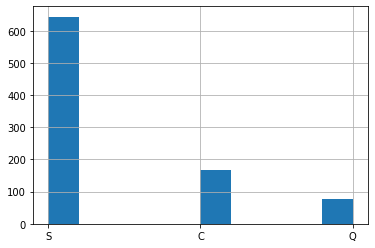

In [17]:
X['Embarked'].hist()

In [18]:
X.loc[X['Embarked'].isna(), 'Embarked'] = 'S'

X.drop(columns = ['Name', 'Salutation'], inplace = True)
X.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Categorical Encoding

**Encoding Categorical Features - Pclass, Sex, Embarked**

In [19]:
X = pd.get_dummies(X, columns = ['Pclass', 'Sex', 'Embarked'])
X.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


## Part - 3

## Building Model

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 32, test_size = 0.2)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(222.68085451244812, 211.7178947368421, 'Sex_female <= 0.5\ngini = 0.471\nsamples = 712\nvalue = [441, 271]\nclass = Survived'),
 Text(172.0343231327801, 200.2736842105263, 'Fare <= 26.269\ngini = 0.304\nsamples = 460\nvalue = [374, 86]\nclass = Survived'),
 Text(124.57321058091286, 188.82947368421054, 'Parch <= 0.5\ngini = 0.228\nsamples = 336\nvalue = [292, 44]\nclass = Survived'),
 Text(89.38708506224066, 177.38526315789474, 'Embarked_C <= 0.5\ngini = 0.182\nsamples = 306\nvalue = [275, 31]\nclass = Survived'),
 Text(35.6853734439834, 165.94105263157894, 'Fare <= 7.746\ngini = 0.165\nsamples = 275\nvalue = [250, 25]\nclass = Survived'),
 Text(5.556846473029045, 154.49684210526317, 'Age <= 23.0\ngini = 0.069\nsamples = 56\nvalue = [54, 2]\nclass = Survived'),
 Text(2.7784232365145227, 143.05263157894737, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]\nclass = Survived'),
 Text(8.335269709543567, 143.05263157894737, 'Age <= 27.0\ngini = 0.137\nsamples = 27\nvalue = [25, 2]\nclass = S

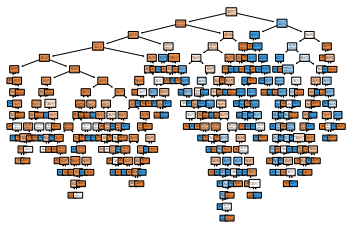

In [21]:
plot_tree(model, filled = True, rounded = True, class_names = ['Survived', 'Died'], feature_names=X.columns)

In [22]:
y_pred = model.predict(X_test)

**Evaluating Metrics**

Confsion Matrix

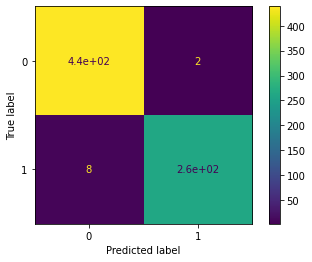

In [23]:
from sklearn.metrics import plot_confusion_matrix, classification_report
plot_confusion_matrix(model, X_train, y_train)

Classification Report

In [24]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       108
           1       0.70      0.72      0.71        71

    accuracy                           0.77       179
   macro avg       0.75      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



## Part - 4

## Pruning

Cost Complexity Pruning - alpha determines pruning level

In [25]:
path = model.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 6.68806849e-05, 9.36329588e-05, 2.00642055e-04,
        3.74531835e-04, 4.21348315e-04, 4.28036383e-04, 4.68164794e-04,
        4.68164794e-04, 4.68164794e-04, 4.70737128e-04, 5.85205993e-04,
        6.84240853e-04, 7.28727100e-04, 8.02568218e-04, 8.58302122e-04,
        9.17220821e-04, 9.24910935e-04, 9.36329588e-04, 9.77638246e-04,
        9.94850187e-04, 1.00321027e-03, 1.00321027e-03, 1.00835494e-03,
        1.01367855e-03, 1.05337079e-03, 1.05337079e-03, 1.05337079e-03,
        1.12359551e-03, 1.12359551e-03, 1.12359551e-03, 1.12359551e-03,
        1.12455900e-03, 1.20385233e-03, 1.22893258e-03, 1.25401284e-03,
        1.27681307e-03, 1.29645635e-03, 1.31446269e-03, 1.31671348e-03,
        1.32187707e-03, 1.33057363e-03, 1.33426966e-03, 1.34065373e-03,
        1.46301498e-03, 1.63857678e-03, 1.64217805e-03, 1.68905597e-03,
        1.74374423e-03, 1.79277651e-03, 1.79828292e-03, 1.90214691e-03,
        1.91167291e-03, 1.93117978e-03, 2.34082397

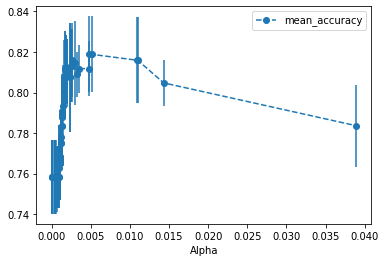

In [26]:
from sklearn.model_selection import cross_val_score
alpha = []
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1] #excluding the max alpha value -> coz max alpha prunes all leaves leaving us only with the root

#creating one DT for each alpha and storing its cross_val_score in a array
for a in ccp_alphas:
  dt = DecisionTreeClassifier(random_state = 30, ccp_alpha = a)
  score = cross_val_score(dt, X_train, y_train, cv=5)
  alpha.append([a, np.mean(score), np.std(score)])

df_alpha = pd.DataFrame(alpha, columns = ['Alpha', 'mean_accuracy', 'std_accuracy'])
df_alpha.plot(x = 'Alpha', y = 'mean_accuracy', yerr = 'std_accuracy', marker = 'o', ls = '--')
##See pandas.DataFrame.plot() for reference

In [27]:
ccp_alphas[(ccp_alphas > 0.010) & (ccp_alphas < 0.015) ]

array([0.01085229, 0.0109816 , 0.01431445])

## Part - 5

## Building Pruned Model

In [28]:
model_pruned = DecisionTreeClassifier(random_state = 30, ccp_alpha=0.0109816)
model_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0109816, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=30, splitter='best')

[Text(418.5, 332.955, 'Sex_male <= 0.5\ngini = 0.471\nsamples = 712\nvalue = [441, 271]\nclass = Survived'),
 Text(209.25, 237.825, 'Pclass_3 <= 0.5\ngini = 0.39\nsamples = 252\nvalue = [67, 185]\nclass = Died'),
 Text(104.625, 142.695, 'gini = 0.097\nsamples = 137\nvalue = [7, 130]\nclass = Died'),
 Text(313.875, 142.695, 'Fare <= 22.904\ngini = 0.499\nsamples = 115\nvalue = [60, 55]\nclass = Survived'),
 Text(209.25, 47.565, 'gini = 0.487\nsamples = 93\nvalue = [39, 54]\nclass = Died'),
 Text(418.5, 47.565, 'gini = 0.087\nsamples = 22\nvalue = [21, 1]\nclass = Survived'),
 Text(627.75, 237.825, 'Fare <= 26.269\ngini = 0.304\nsamples = 460\nvalue = [374, 86]\nclass = Survived'),
 Text(523.125, 142.695, 'gini = 0.228\nsamples = 336\nvalue = [292, 44]\nclass = Survived'),
 Text(732.375, 142.695, 'gini = 0.448\nsamples = 124\nvalue = [82, 42]\nclass = Survived')]

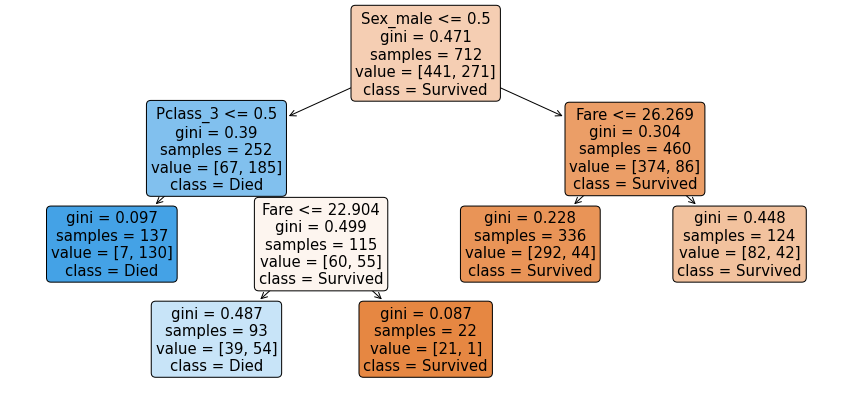

In [30]:
plt.figure(figsize = (15,7) )
plot_tree(model_pruned, filled = True, rounded = True, class_names = ['Survived', 'Died'], feature_names=X.columns)

In [31]:
y_pred = model_pruned.predict(X_test)

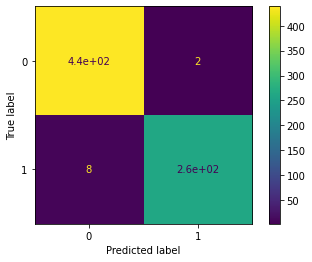

In [32]:
plot_confusion_matrix(model, X_train, y_train)

In [33]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       108
           1       0.80      0.63      0.71        71

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



**There is better improvement in Classification Report after pruning!**